In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
#inputs for clay loam
phi_ae=630 #mm
b=8.52
kh=0.000245 #cm/s
kh=kh*10*60*60 #mm/hr
n=0.476
theta_i=np.array([0.18,0.24,0.30,0.36,0.42]) #inital volumetric soil moisture content
catchment_frac=np.array([0.40,0.25,0.20,0.10,0.05])
# inputs for watershed
w= 30 #mm/h
dur=4 #hr

In [55]:
ks=kh*(2/3)
phi_f=phi_ae*((2*b+3)/(2*b+6))
sp=np.sqrt(kh*(n-theta_i)*phi_f)
tc=sp*sp/(4*(w-ks)*(w-ks))
tp=(sp*sp*(2*w-ks))/(4*w*(w-ks)*(w-ks))
ts=tp-tc
#time_step for model is till 4hrs
time_step=np.concatenate([np.array([0.01]),np.arange(0.025,0.076,0.025),np.arange(0.1,4.1,0.1)])
df1=df2=df3=df4=df5=pd.DataFrame(time_step,columns=['time'])
df_list=[df1,df2,df3,df4,df5]

In [56]:
def philip_model(w,df,tp,ts,sp,ks):
    df['T']=""
    df['f']=""
    df['F']=""
    mask=df.time<tp
    mask1=df.time>tp
    #https://stackoverflow.com/questions/50932651/perform-a-conditional-operation-on-a-pandas-column
    df.loc[mask,'T']=df.loc[mask,'time']
    df.loc[mask1,'T']=(df.loc[mask1,'time']-ts)
    df.loc[mask, 'f']=w
    df.loc[mask1,'f']=sp*np.power(df.loc[mask1,'T'],-0.5)+ks
    df['F']=df['f']*df['T']
    df['cumm_rain']=df['time']*w
    df['runoff']=df['cumm_rain']-df['F']
    plt.plot(df.time,df.cumm_rain,'^g',df.time,df.F,'--r',df.time,df.runoff,'.b')
    return df.runoff.values[-1]
    

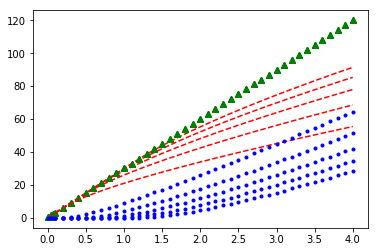

In [57]:
i=0
runoff=[]
for df in df_list:
    r=philip_model(w,df,tp[i],ts[i],sp[i],ks)
    runoff.append(r)
    i=i+1
   

In [58]:
runoff

[28.56759536507937,
 34.66488832383045,
 42.06087108071738,
 51.42416767806692,
 64.51364660915763]

In [60]:
basin_average_runoff=np.sum(np.array(runoff)*catchment_frac)/np.sum(catchment_frac)

In [61]:
basin_average_runoff

36.87353354139741